*   ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap01/'
OutputDir    = '1Error-0402SDM/'
FileBaseName = '1Error-0402SDM'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
import pandas as pd
print('pandas     Ver.', pd.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
pandas     Ver. 2.2.3
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-0402SDM/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-0402SDM/


最確値を書式化して文字列として返す関数
```
Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False )
```
*   返値: 書式化された文字列を返す。
*   v_mean: 平均値
*   v_std:  標準偏差
*   s_unit: 値の単位(文字列)
*   std_2digit=True: 標準偏差を2桁表示。Falseにすると1桁表示
*   latex=False: テキスト文字列として出力。Trueでは、図などでlatex表示できる文字列で出力。

In [4]:
def Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False ):
  #
  # 平均値の冪数
  order_mean = np.floor( np.log10(v_mean) )
  # print( 'order_mean=', order_mean )
  #
  # 標準偏差の冪数
  if std_2digits:
    # 標準偏差を有効2桁表示
    order_std  = np.floor( np.log10(v_std) - 1.0 )
  else:
    # 標準偏差を有効1桁表示
    order_std  = np.floor( np.log10(v_std) - 0.0 )
  # print( 'order_std=', order_std )
  #
  # 平均値の冪数と標準偏差の冪数の符号が同じか?
  if order_mean * order_std > 0.0:
    # 例1
    # v_mean = 4.60572E5
    # v_std  = 8.96E3
    # 例2
    # v_mean = 4.605723E-2
    # v_std  = 8.96E-5
    multi_order = order_std+1
    #
    # 共通する冪数
    multi = 10.0**multi_order
    #
    # 共通する冪数で規格化
    v_mean = v_mean / multi
    v_std  = v_std  / multi
    #
    # 共通した冪数で指数をくくって、係数は少数第1位
    if latex:
      out_str = r'(%+.1f $\pm$ %.1f)$\times10^{%+d}$ ' % (v_mean, v_std, multi_order) + s_unit
    else:
      out_str = '(%+.1f +/- %.1f)x10^(%+d) ' % (v_mean, v_std, multi_order) + s_unit
    #
  else:
    # 平均値の冪数と標準偏差の冪数の符号が異なる
    # 例2
    # v_mean = 4.605723
    # v_std  = 0.0896
    fmt_std1 = r'$%%+.%df$' % -order_std
    fmt_std2 = r'$%%.%df$'  % -order_std
    if latex:
      fmt_str = fmt_std1 + r' $\pm$ ' + fmt_std2 + ' ' + s_unit
    else:
      fmt_str = fmt_std1 + ' +/- ' + fmt_std2 + ' ' + s_unit
    #
    out_str = fmt_str % (v_mean, v_std)
  #
  return out_str

データのグラフを描く関数

In [5]:
############################################
def GrfData( x_data, y_data, x_label='x', y_label='y', y_sets=None, bbox_to_anchor=None ):
  #
  plt.rcParams['font.size'] = 24
  #
  if bbox_to_anchor is None:
    fig = plt.figure( figsize=(8,8) )
    #
    fig.subplots_adjust(left=0.18, right=0.97, top=0.97, bottom=0.12)
    #
  else:
    fig = plt.figure( figsize=(13,8) )
    #
    fig.subplots_adjust(left=0.13, right=0.6, top=0.97, bottom=0.12)
    #
  #
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( x_label )
  ax1.set_ylabel( y_label )
  #
  ax1.plot( x_data, y_data, color='black', label=r'$\vec{y}$', linewidth=2.0, linestyle='solid' )
  #
  if y_sets is not None:
    for y_set in y_sets:
      #
      y_set_data   = y_set[ 0 ]
      y_set_label  = y_set[ 1 ]
      y_set_color  = y_set[ 2 ]
      y_set_lstyle = y_set[ 3 ]
      y_set_lwidth = y_set[ 4 ]
      #
      ax1.plot( x_data, y_set_data, color=y_set_color, label=y_set_label, linewidth=y_set_lwidth, linestyle=y_set_lstyle )
    #
  #
  if bbox_to_anchor is None:
    plt.legend( fontsize=24, loc='upper right', borderaxespad=0 )
  else:
    plt.legend( fontsize=20, bbox_to_anchor=bbox_to_anchor, loc='upper left', borderaxespad=0 )
  #
  plt.show()
  #
  return fig


非線形関数:  
$$y\approx{}g(t;f) = \sin(2\pi{}ft)$$

測定データを模倣した人工データ
* $y_{i} = g(t_{i};f)+{\cal{}N}(0,\sigma_{y})$
* $f_{\rm{}true} = 2.0$ Hz
* $t_{i}=0.0\sim1.0$ sec
* $\sigma_{y}=0.05$

人工データのグラフを描く

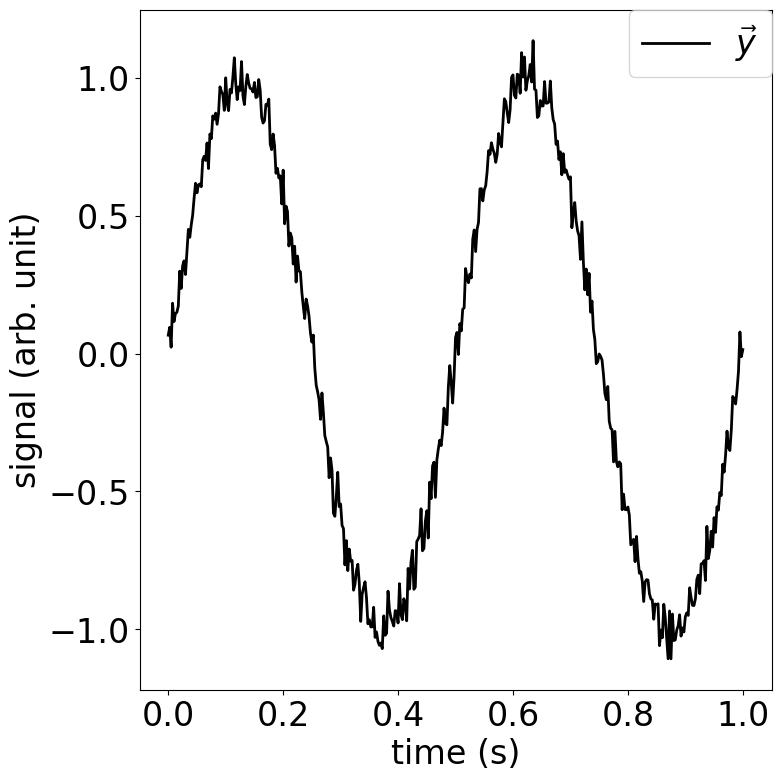

In [6]:
############################################
def g(t,f):
  return 1.0*np.sin( 2.0 * np.pi * f * t )
#
############################################
data_n  = 401
sigma_y = 0.05
a_true  = 2.0
#
x_data = np.linspace( 0.0, 1.0, num=data_n, endpoint=True)
y_data = g( x_data, a_true) + np.random.normal(size=data_n, scale=sigma_y)
#
fig = GrfData( x_data, y_data, x_label='time (s)', y_label='signal (arb. unit)' )
#
#
fig.savefig( FilePath + FileBaseName + '-01.pdf' )

誤差関数 $$ E(f)=\sum^{M}[y_{m}-g(t_{m};f)]^{2} $$

誤差関数を描く
* $f=0\sim4.0$ Hz

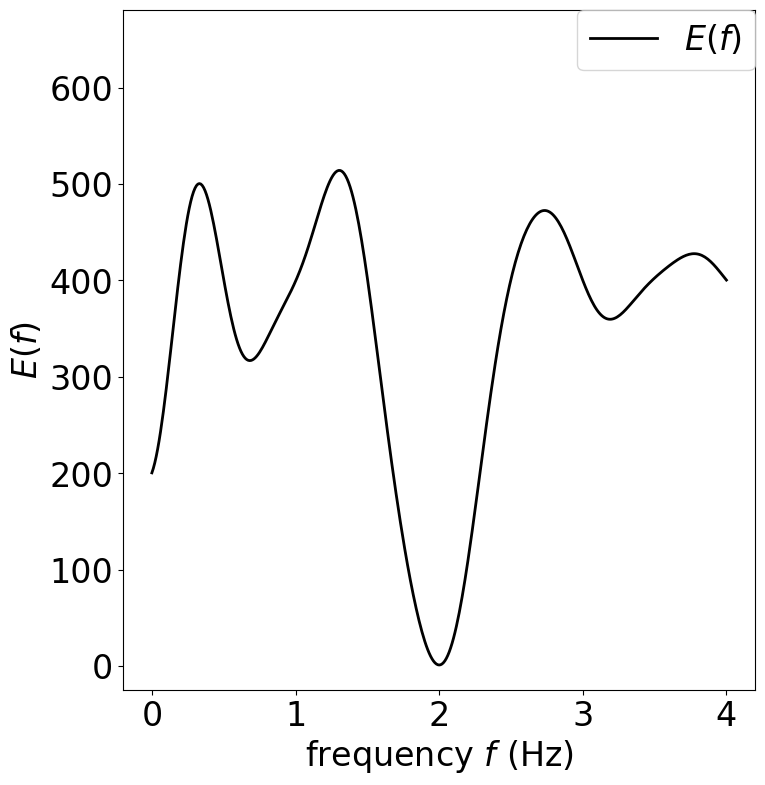

In [7]:
############################################
def E(f):
  return np.sum( (y_data - g(x_data,f))**2 )

############################################
f_data = np.linspace(0.0,4.0, num=401, endpoint=True)
E_data = np.zeros_like( f_data )

############################################
idx_ = 0
for f in f_data:
  E_data[idx_] = E(f)
  idx_         = idx_ + 1

############################################
plt.rcParams['font.size'] = 24
#
fig = plt.figure( figsize=(8,8) )
#
fig.subplots_adjust(left=0.18, right=0.97, top=0.97, bottom=0.12)
#
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel( r'frequency $f$ (Hz)' )
ax1.set_ylabel( r'$E(f)$' )
#
ax1.plot( f_data, E_data, color='black', label=r'$E(f)$', linewidth=2.0, linestyle='solid' )
#
y_bot, y_top = ax1.set_ylim()
y_center = (y_top + y_bot) / 2.0
y_width  = (y_top - y_bot) / 2.0
y_bot, y_top = ax1.set_ylim(y_center - y_width, y_center + 1.5* y_width)
#
plt.legend( fontsize=24,loc='upper right', borderaxespad=0 )
#
plt.show()
#
fig.savefig( FilePath + FileBaseName + '-02.pdf' )

関数の数値微分
$$
\left.
\frac{\partial{}}{\partial{}x}f(x)
\right|_{x=x_{0}}
=
\lim_{h\rightarrow0}
\frac{
  f(x_{0}+h)-f(x_{0}-h)
}{2h}
$$

0. 微分係数の相対誤差EPSを設定し、$\Delta_{prev}=0.0$とする。また区間$h$の初期値を$h=1.0$とする。
1. 微係数$\Delta$を計算。$$\Delta=\frac{f(x_{0}+h)-f(x_{0}-h)}{2h}$$
2. 微係数$\Delta$の相対誤差を計算し、設定したEPS未満であればループを抜ける。$$\left|\frac{\Delta-\Delta_{prev}}{\Delta}\right|<{\rm{}EPS}$$
3. $\Delta_{prev}\leftarrow\Delta$とし$h\leftarrow{}h/2$として、1~3を繰り返す。ただし、この繰り返しが20回を超える場合は終了する。


In [8]:
############################################
def num_derivative( func, x0, h_init=1.0, eps=1.0E-6, max_iters=20 ):
  h = h_init
  prev = 0.0
  for i in range(max_iters):
    df  = (func(x0 + h) - func(x0 - h)) / (2 * h)
    ddf = np.abs((df - prev)/df)
    #
    # print( '%03d: %.3E: df0=%+.16E: ddf=%+.16E' % (i, h, df, ddf) )
    #
    if ddf < eps:
      break
    #
    prev = df
    h = h/2
    #
  return df
#
# num_derivative( E, 2.0)

誤差関数の1階微分の関数定義
$$
\frac{\partial{}}{\partial{}f}E(f)
$$
誤差関数の2階微分の関数定義
$$
\frac{\partial^{2}}{\partial{}f^{2}}E(f)
$$

In [9]:
############################################
# E(f)の1階微分
def dE_df(f):
  return num_derivative( E, f )
#
############################################
# E(f)の2階微分
def d2E_df2(f):
  return num_derivative( dE_df, f )

誤差関数の1階微分の関数のグラフ

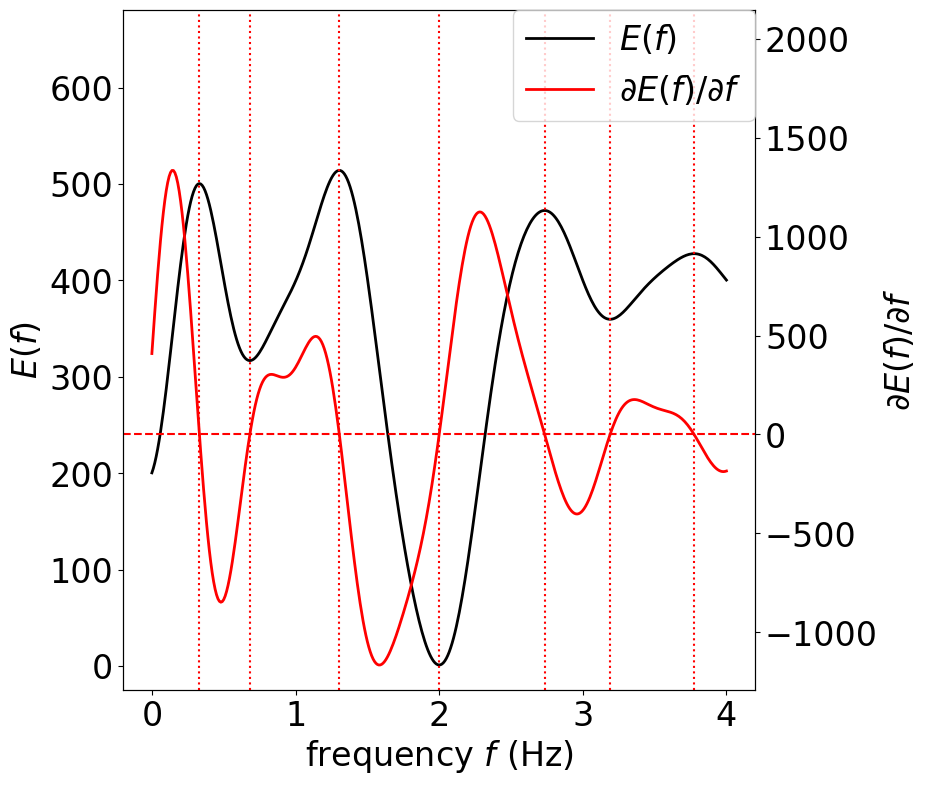

In [10]:
############################################
# E(f)の1階微分
############################################
dE_df_data = np.zeros_like( f_data )
#
idx_ = 0
for f in f_data:
  dE_df_data[idx_] = dE_df(f)
  idx_             = idx_ + 1
#
############################################
plt.rcParams['font.size'] = 24
#
fig = plt.figure( figsize=(8,8) )
#
fig.subplots_adjust(left=0.18, right=0.97, top=0.97, bottom=0.12)
#
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel( r'frequency $f$ (Hz)' )
ax1.set_ylabel( r'$E(f)$' )
#
ax1.plot( f_data, E_data, color='black', label=r'$E(f)$', linewidth=2.0, linestyle='solid' )
#
y_bot, y_top = ax1.set_ylim()
y_center = (y_top + y_bot) / 2.0
y_width  = (y_top - y_bot) / 2.0
y_bot, y_top = ax1.set_ylim(y_center - y_width, y_center + 1.5* y_width)
#
ax1line, ax1label = ax1.get_legend_handles_labels()
#
ax2 = ax1.twinx()
ax2.set_ylabel( r'$\partial{}E(f)/\partial{}f$' )
#
ax2.plot( f_data, dE_df_data, color='red', label=r'$\partial{}E(f)/\partial{}f$', linewidth=2.0, linestyle='solid' )
#
y_bot, y_top = ax2.set_ylim()
y_center = (y_top + y_bot) / 2.0
y_width  = (y_top - y_bot) / 2.0
y_bot, y_top = ax2.set_ylim(y_center - y_width, y_center + 1.5* y_width)
#
ax2line, ax2label = ax2.get_legend_handles_labels()
#
ax2.axhline(0.0,0.0,1.0, color='red', linestyle='dashed')
#
for idx in range( len(f_data)-1 ):
  dE1 = dE_df_data[idx  ]
  dE2 = dE_df_data[idx+1]
  if dE1 * dE2 <=0.0:
    f1 = f_data[idx  ]
    f2 = f_data[idx+1]
    f0 = f1 - dE1/(dE2-dE1)*(f2-f1)
    ax2.axvline( f0,0.0,1.0, color='red', linestyle='dotted')
#
ax2.legend( ax1line + ax2line, ax1label + ax2label, fontsize=24, loc='upper right', borderaxespad=0 )
#
plt.show()
#
# fig.savefig( FilePath + FileBaseName + '-03.pdf' )

誤差関数の2階微分の関数のグラフ

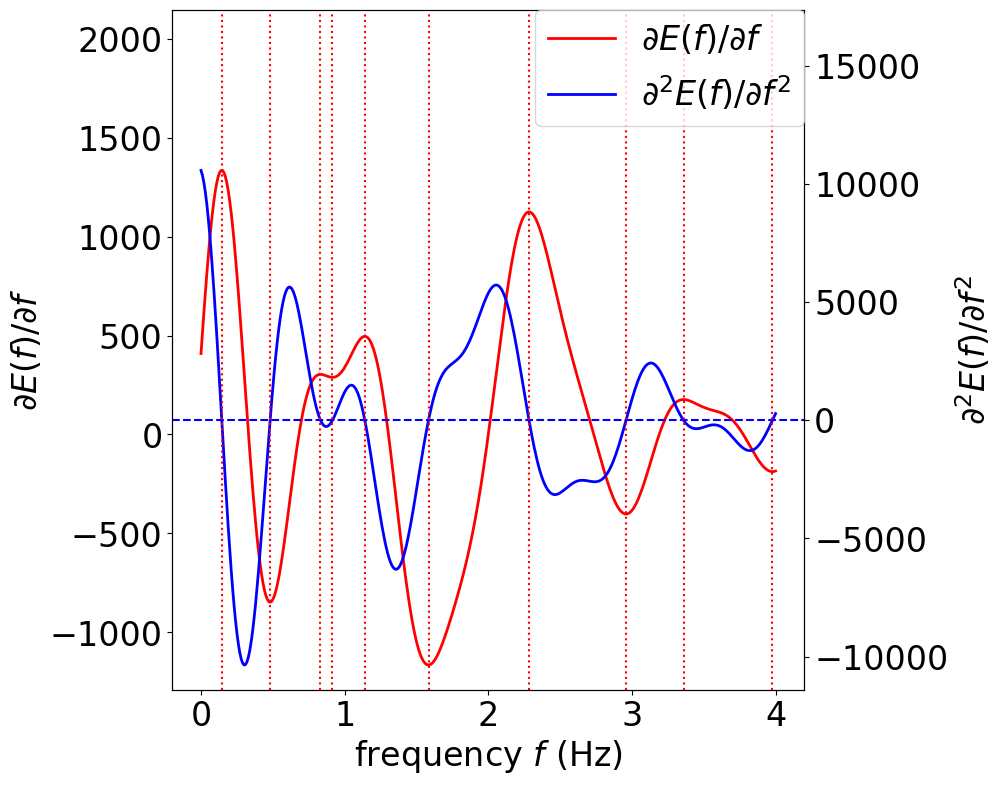

In [11]:
############################################
# E(f)の2階微分
############################################
d2E_df2_data = np.zeros_like( f_data )
#
idx_ = 0
for f in f_data:
  d2E_df2_data[idx_] = d2E_df2(f)
  idx_               = idx_ + 1
#
############################################
plt.rcParams['font.size'] = 24
#
fig = plt.figure( figsize=(8,8) )
#
fig.subplots_adjust(left=0.18, right=0.97, top=0.97, bottom=0.12)
#
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel( r'frequency $f$ (Hz)' )
ax1.set_ylabel( r'$\partial{}E(f)/\partial{}f$' )
#
# ax1.plot( f_data, E_data, color='black', label=r'$E(f)$', linewidth=2.0, linestyle='solid' )
ax1.plot( f_data, dE_df_data, color='red', label=r'$\partial{}E(f)/\partial{}f$', linewidth=2.0, linestyle='solid' )
#
y_bot, y_top = ax1.set_ylim()
y_center = (y_top + y_bot) / 2.0
y_width  = (y_top - y_bot) / 2.0
y_bot, y_top = ax1.set_ylim(y_center - y_width, y_center + 1.5* y_width)
#
#
ax1line, ax1label = ax1.get_legend_handles_labels()
#
ax2 = ax1.twinx()
ax2.set_ylabel( r'$\partial^{2}E(f)/\partial{}f^{2}$' )
#
ax2.plot( f_data, d2E_df2_data, color='blue', label=r'$\partial^{2}E(f)/\partial{}f^{2}$', linewidth=2.0, linestyle='solid' )
#
y_bot, y_top = ax2.set_ylim()
y_center = (y_top + y_bot) / 2.0
y_width  = (y_top - y_bot) / 2.0
y_bot, y_top = ax2.set_ylim(y_center - y_width, y_center + 1.5* y_width)
#
ax2line, ax2label = ax2.get_legend_handles_labels()
#
ax2.axhline(0.0,0.0,1.0, color='blue', linestyle='dashed')
#
for idx in range( len(f_data)-1 ):
  dE1 = d2E_df2_data[idx  ]
  dE2 = d2E_df2_data[idx+1]
  if dE1 * dE2 <=0.0:
    f1 = f_data[idx  ]
    f2 = f_data[idx+1]
    f0 = f1 - dE1/(dE2-dE1)*(f2-f1)
    ax2.axvline( f0,0.0,1.0, color='red', linestyle='dotted')
#
ax2.legend( ax1line + ax2line, ax1label + ax2label, fontsize=24, loc='upper right', borderaxespad=0 )
#
plt.show()
#
# fig.savefig( FilePath + FileBaseName + '-04.pdf' )

最急降下法(Steepest descent method)
$$
\theta_{n}
\leftarrow
\theta_{n}
-
\eta_{\theta_{n}}
\frac{\partial}{\partial{}\theta_{n}}
E(\boldsymbol{\theta})
$$

In [12]:
############################################
def SDM( ErrFunc, x0, delta_x, eta, max_iter=100 ):
  #
  steps_x   = []
  steps_Err = []
  #
  x_prev     = x0
  E_prev     = ErrFunc( x_prev )
  dE_dx_prev = dE_df( x_prev )
  #
  steps_x.append(   x_prev )
  steps_Err.append( E_prev )
  #
  loopFlag = True
  iters    = 0
  #
  while (loopFlag & (iters < max_iter)):
    #
    x_new     = x_prev - eta * num_derivative( ErrFunc, x_prev )
    E_new     = ErrFunc( x_new )
    dE_dx_new = dE_df( x_new )
    d2E_dx2   = d2E_df2( x_new )
    #
    steps_x.append(   x_new )
    steps_Err.append( E_new )
    #
    if ( (np.abs(dE_dx_new) <= np.abs( d2E_dx2 * delta_x )) & (dE_dx_prev * dE_dx_new <=0.0) ):
      loopFlag = False
    #
    x_prev     = x_new
    E_prev     = E_new
    dE_dx_prev = dE_df( x_new )
    #
    iters = iters + 1
    #
  #
  return x_new, E_new, steps_x, steps_Err

In [13]:
############################################
def GrfSDM( x_data, Err_data, SDM_x, SDM_Err, SDMsteps_x, SDMsteps_Err, delta_x, unit='',  x_label='x' ):
  #
  plt.rcParams['font.size'] = 24
  #
  fig = plt.figure( figsize=(8,8) )
  #
  fig.subplots_adjust(left=0.18, right=0.97, top=0.97, bottom=0.12)
  #
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( x_label )
  ax1.set_ylabel( r'$E(f)$' )
  #
  ax1.plot( x_data, Err_data, color='black', label=r'$E(f)$', linewidth=2.0, linestyle='solid' )
  #
  ax1.scatter( SDMsteps_x, SDMsteps_Err, s=40, color='red', label='SDM steps (%d)' % len(SDMsteps_x) )
  #
  y_bot, y_top = ax1.set_ylim()
  y_center = (y_top + y_bot) / 2.0
  y_width  = (y_top - y_bot) / 2.0
  y_bot, y_top = ax1.set_ylim(y_center - y_width, y_center + 1.5* y_width)
  #
  for i_ in range( len(SDMsteps_x)-1 ):
    #
    arrow_x  = SDMsteps_x[   i_ ]
    arrow_y  = SDMsteps_Err[ i_ ]
    arrow_dx = SDMsteps_x[   i_+1 ] - arrow_x
    arrow_dy = SDMsteps_Err[ i_+1 ] - arrow_y
    #
    ax1.arrow( arrow_x, arrow_y, arrow_dx, arrow_dy, color='red', shape='right' )
    #
  #
  label_x_SDM = Format_MostProbableValue( SDM_x, delta_x, unit, latex=True )
  #
  ax1.axvline( SDM_x,   0, 1, color='red', linestyle='dashed', label=label_x_SDM )
  ax1.axhline( SDM_Err, 0, 1, color='red', linestyle='dashed' )
  #
  plt.legend( fontsize=22, loc='upper right', borderaxespad=0 )
  #
  plt.show()
  #
  return fig

  0: f=+1.35000000, E=+5.08149474E+02
  1: f=+1.40473932, E=+4.83800792E+02
  2: f=+1.52712675, E=+3.73214134E+02
  3: f=+1.74970201, E=+1.31077588E+02
  4: f=+1.93072527, E=+1.32759652E+01
  5: f=+1.99852163, E=+1.06451882E+00
  6: f=+2.00038427, E=+1.05647592E+00
  7: f=+2.00024746, E=+1.05643266E+00


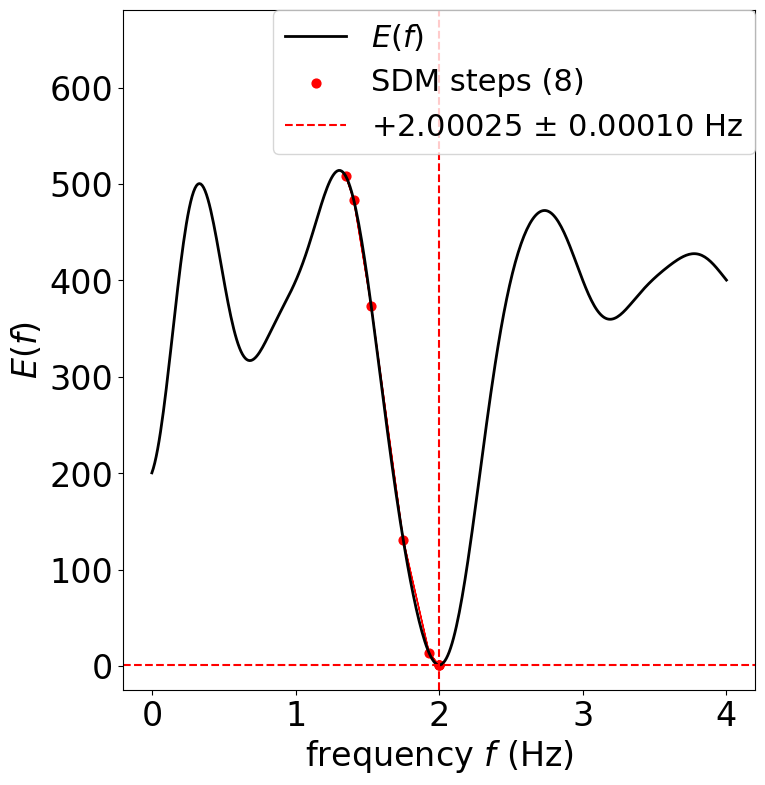

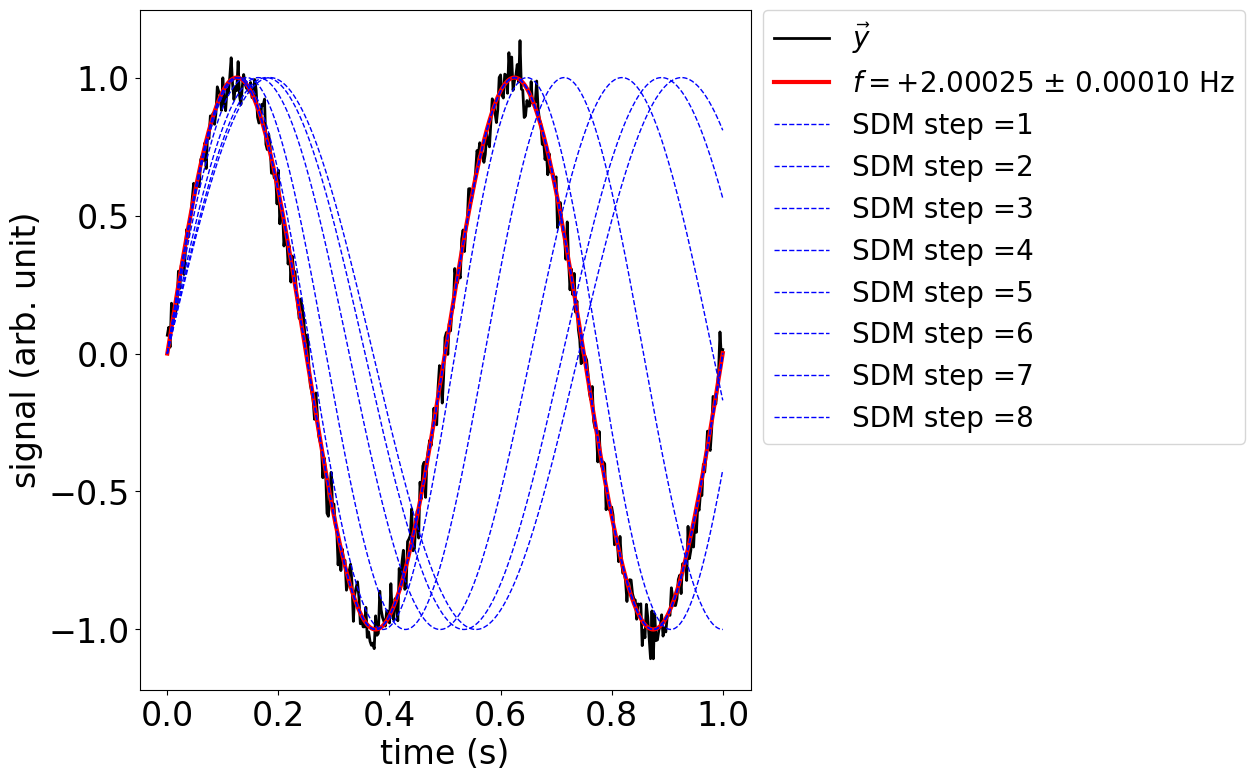

In [14]:
############################################
eta     = 2.0E-4
#
f_0     = 1.35
delta_f = 1.0E-4
#
f_SDM, E_SDM, Steps_x, Steps_Err = SDM( E, f_0, 1.0E-4, eta )
#
for i_ in range( len(Steps_x) ):
  print( '%3d: f=%+.8f, E=%+.8E' % (i_, Steps_x[i_], Steps_Err[i_]) )
#
############################################
fig = GrfSDM( f_data, E_data, f_SDM, E_SDM, Steps_x, Steps_Err, delta_f, unit='Hz',  x_label=r'frequency $f$ (Hz)' )
#
fig.savefig( FilePath + FileBaseName + '-05.pdf' )
#
############################################
y_SDM       = g( x_data, f_SDM)
label_f_SDM = r'$f=$'+Format_MostProbableValue( f_SDM, delta_f, 'Hz', latex=True )
Ysets = [[ y_SDM, label_f_SDM, 'red', 'solid', 3.0 ]]
#
i_step = int( np.ceil( len(Steps_x)/10 ) )
i_ = 0
while i_ < len(Steps_x):
  y_temp       = g( x_data, Steps_x[i_] )
  label_y_temp = 'SDM step =%d' % (i_+1)
  Ysets.append( [y_temp, label_y_temp, 'blue', 'dashed', 1.0 ] )
  i_ = i_ + i_step
#
fig = GrfData( x_data, y_data, y_sets=Ysets, x_label='time (s)', y_label='signal (arb. unit)',bbox_to_anchor=(1.02,1) )
#
#
fig.savefig( FilePath + FileBaseName + '-06.pdf' )

  0: f=+1.30000000, E=+5.14133482E+02
  1: f=+1.29423396, E=+5.13874237E+02
  2: f=+1.28204199, E=+5.12729772E+02
  3: f=+1.25681776, E=+5.07982167E+02
  4: f=+1.20743414, E=+4.91201553E+02
  5: f=+1.12404064, E=+4.51571680E+02
  6: f=+1.02562017, E=+4.08256182E+02
  7: f=+0.95109612, E=+3.83742922E+02
  8: f=+0.89166462, E=+3.66455936E+02
  9: f=+0.83333793, E=+3.49039469E+02
 10: f=+0.77257800, E=+3.31224668E+02
 11: f=+0.71891140, E=+3.19682999E+02
 12: f=+0.68996080, E=+3.17007341E+02
 13: f=+0.68291545, E=+3.16867128E+02
 14: f=+0.68205205, E=+3.16865080E+02
 15: f=+0.68196738, E=+3.16865060E+02
 16: f=+0.68195932, E=+3.16865060E+02
 17: f=+0.68195856, E=+3.16865060E+02
 18: f=+0.68195848, E=+3.16865060E+02
 19: f=+0.68195848, E=+3.16865060E+02
 20: f=+0.68195848, E=+3.16865060E+02
 21: f=+0.68195848, E=+3.16865060E+02
 22: f=+0.68195848, E=+3.16865060E+02
 23: f=+0.68195848, E=+3.16865060E+02


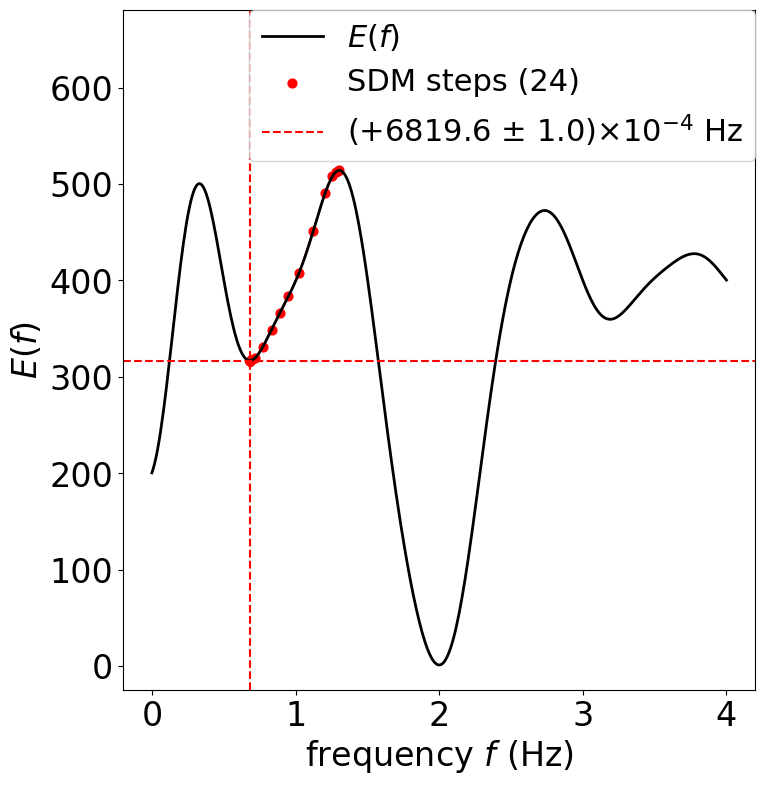

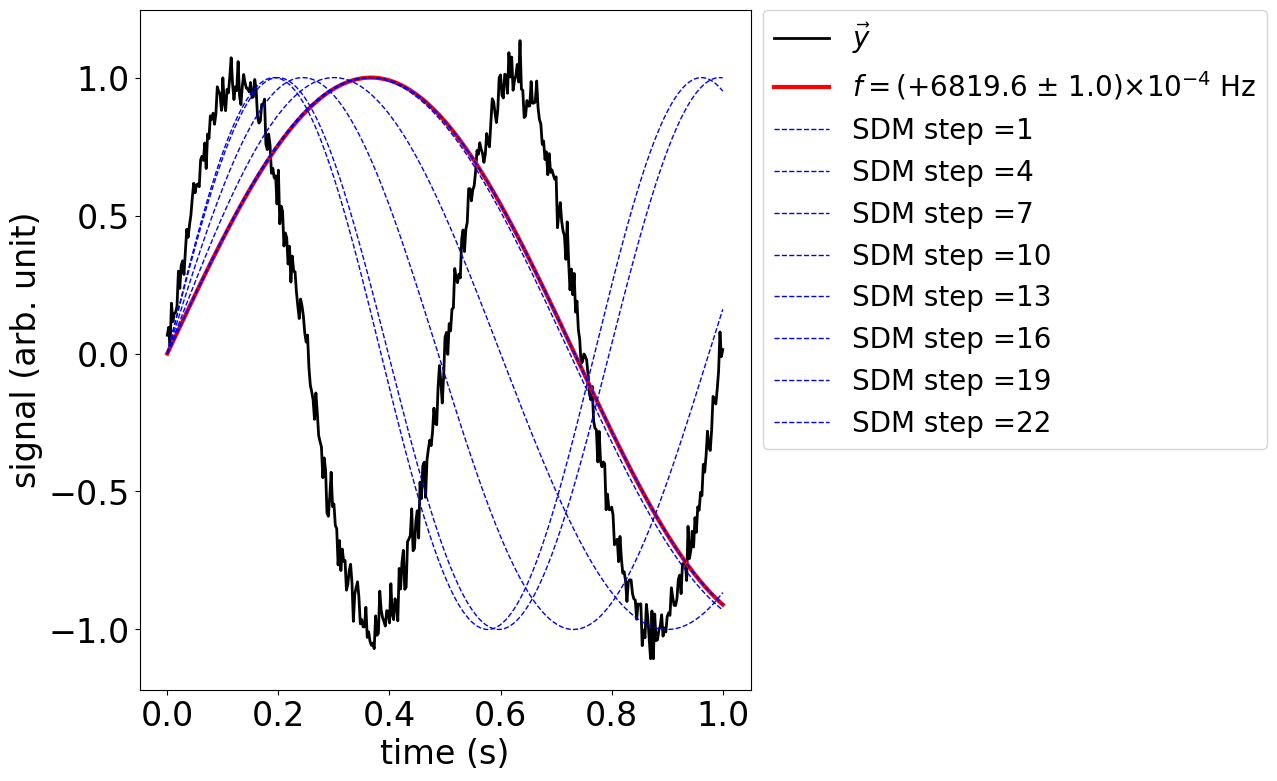

In [15]:
############################################
eta     = 2.0E-4
#
f_0     = 1.3
delta_f = 1.0E-4
#
f_SDM, E_SDM, Steps_x, Steps_Err = SDM( E, f_0, 1.0E-4, eta )
#
for i_ in range( len(Steps_x) ):
  print( '%3d: f=%+.8f, E=%+.8E' % (i_, Steps_x[i_], Steps_Err[i_]) )
#
############################################
fig = GrfSDM( f_data, E_data, f_SDM, E_SDM, Steps_x, Steps_Err, delta_f, unit='Hz',  x_label=r'frequency $f$ (Hz)' )
#
fig.savefig( FilePath + FileBaseName + '-07.pdf' )
#
############################################
y_SDM       = g( x_data, f_SDM)
label_f_SDM = r'$f=$'+Format_MostProbableValue( f_SDM, delta_f, 'Hz', latex=True )
Ysets = [[ y_SDM, label_f_SDM, 'red', 'solid', 3.0 ]]
#
i_step = int( np.ceil( len(Steps_x)/10 ) )
i_ = 0
while i_ < len(Steps_x):
  y_temp       = g( x_data, Steps_x[i_] )
  label_y_temp = 'SDM step =%d' % (i_+1)
  Ysets.append( [y_temp, label_y_temp, 'blue', 'dashed', 1.0 ] )
  i_ = i_ + i_step
#
fig = GrfData( x_data, y_data, y_sets=Ysets, x_label='time (s)', y_label='signal (arb. unit)',bbox_to_anchor=(1.02,1) )
#
#
fig.savefig( FilePath + FileBaseName + '-08.pdf' )